In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

# EDA

In [2]:
data = pd.read_csv('../../data/data.csv', names=['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed'])
data.head()

,center,left,right,steering,throttle,brake,speed
0,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/ce...,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/le...,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/ri...,0.0,0.0,0,3.661163
1,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/ce...,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/le...,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/ri...,0.0,0.0,0,3.631739
2,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/ce...,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/le...,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/ri...,0.0,0.0,0,3.595292
3,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/ce...,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/le...,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/ri...,0.0,0.0,0,3.566399
4,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/ce...,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/le...,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/ri...,0.0,0.0,0,3.530607


In [16]:
images_center = data['center']
images_center = [cv.imread(img_path) for img_path in images_center]
images_center = [cv.cvtColor(img, cv.COLOR_BGR2RGB) for img in images_center]

In [17]:
images_center[0].shape

(160, 320, 3)

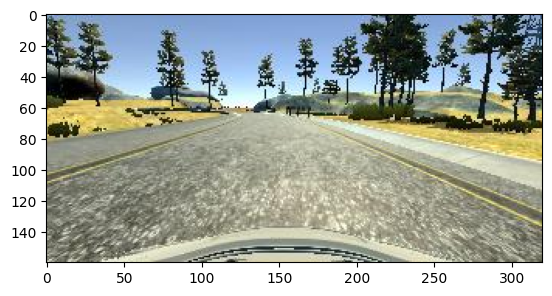

In [18]:
plt.imshow(images_center[0])

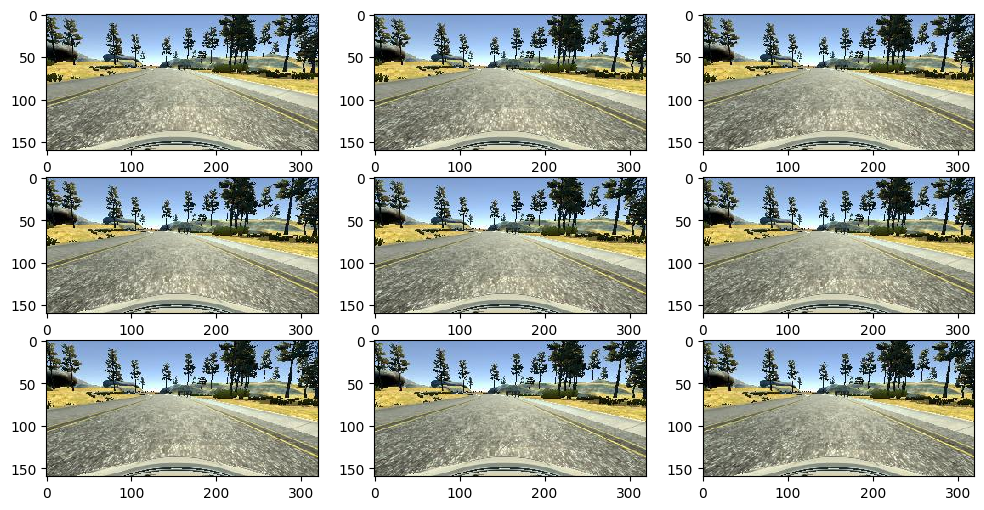

In [19]:
w = 320
h = 160

fig = plt.figure(figsize=(12, 6))
columns = 3
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    plt.imshow(images_center[i], interpolation='nearest')
plt.show()

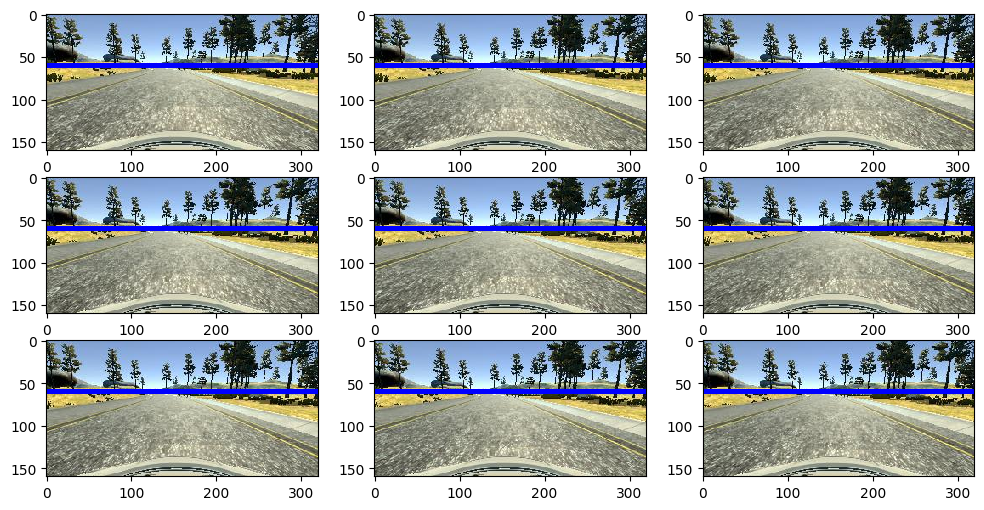

In [20]:
w = 320
h = 160

fig = plt.figure(figsize=(12, 6))
columns = 3
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    img = images_center[i]
    img = cv.line(img, (0, 60), (320, 60), (0, 0, 255), 4)
    plt.imshow(img, interpolation='nearest')
plt.show()

In [21]:
images_center_cropped = [img[60:160, 0:320] for img in images_center]

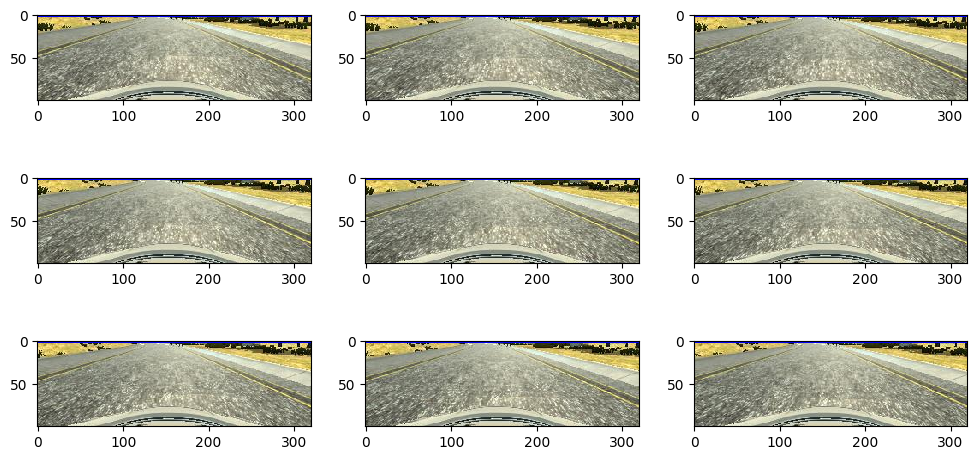

In [22]:

# visualize cropped images
w = 320
h = 160

fig = plt.figure(figsize=(12, 6))
columns = 3
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    plt.imshow(images_center_cropped[i], interpolation='nearest')
plt.show()

In [27]:
video = cv.VideoWriter('../../data/video.avi', cv.VideoWriter_fourcc(*'DIVX'), 20, (320, 100))
for img in images_center_cropped:
    video.write(img)

# Model